In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('dark_background')
#sns.set_theme(style="whitegrid")
# import specific components from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mutual_info_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay
from sklearn.feature_extraction import DictVectorizer

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
# enhanced stats functions
#from scipy import stats
SEED = 42
np.random.seed(SEED)

In [2]:
print(f"pandas version  : {pd.__version__}")  # 1.4.3
print(f"numpy version   : {np.__version__}")  # 1.23.1
print(f"seaborn version : {sns.__version__}") # 0.11.2

pandas version  : 1.4.3
numpy version   : 1.23.3
seaborn version : 0.11.2


In [3]:
# read in data
df = pd.read_csv("housing.csv")

We'll keep working with the 'median_house_value' variable, and we'll transform it to a classification task.

In [4]:
df.shape[0]

20640

In [5]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

Features
For the rest of the homework, you'll need to use only these columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'
'ocean_proximity'

### Data preparation

Select only the features from above and fill in the missing values with 0.

Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.

Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.

Create a new column population_per_household by dividing the column population by the column households from dataframe.

In [6]:
Features = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']

In [7]:
#df

In [8]:
df = df[Features]
df.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [9]:
x = df.isnull().sum().sort_values(ascending=False)
x

total_bedrooms        207
latitude                0
longitude               0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
# Replace missing values with 0
df['total_bedrooms'] = df.total_bedrooms.fillna(0)

In [11]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] /  df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [12]:
df.isnull().sum()

latitude                    0
longitude                   0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

# Question 1
## What is the most frequent observation (mode) for the column ocean_proximity?

In [13]:
df.ocean_proximity.mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

In [14]:
df.dtypes[df.dtypes == 'object'].index

Index(['ocean_proximity'], dtype='object')

In [15]:
categorical_cols = list(df.dtypes[df.dtypes == 'object'].index)
categorical_cols

['ocean_proximity']

# Split data

Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [16]:
# Create test and full training partitions 
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=SEED)

In [17]:
# Create train and validation partitions 
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=SEED)

In [18]:
# Verify the lenght of partitions 
print(len(df_train)), print(len(df_val)), print(len(df_test))
print(len(df_train)*100/len(df)), print(len(df_val)*100/len(df)), print(len(df_test)*100/len(df))

12384
4128
4128
60.0
20.0
20.0


(None, None, None)

In [19]:
# Reset indices of all partitions 
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
# Extract target variable of all partitions 
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [21]:
# Delete target variable for all partitions 
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [22]:
#df_train

# Question 2
### Create the correlation matrix for the numerical features of your train dataset.

### In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

### What are the two features that have the biggest correlation in this dataset?

In [23]:
#data_numeric = df_train.copy()
#data_numeric = df_train.drop("ocean_proximity", axis=1)

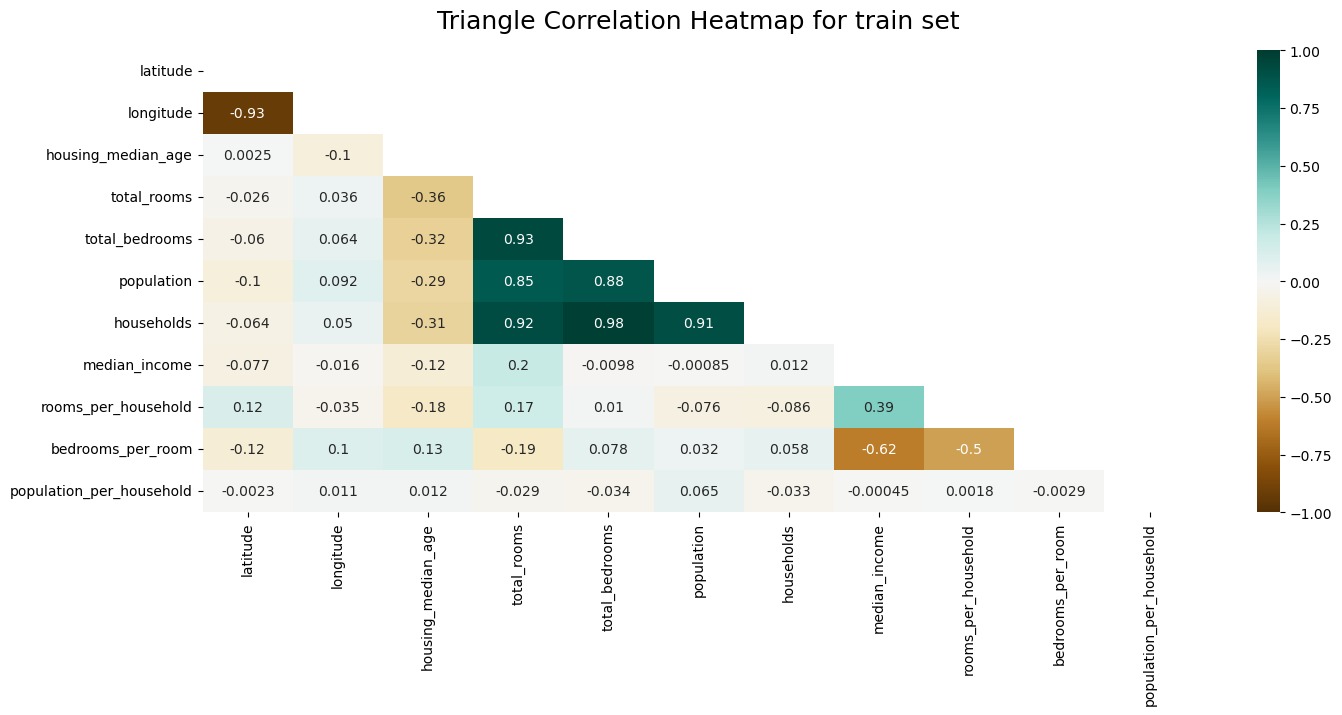

In [24]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_train.corr(), dtype=bool))
heatmap = sns.heatmap(df_train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap for train set', fontdict={'fontsize':18}, pad=16);
plt.show()

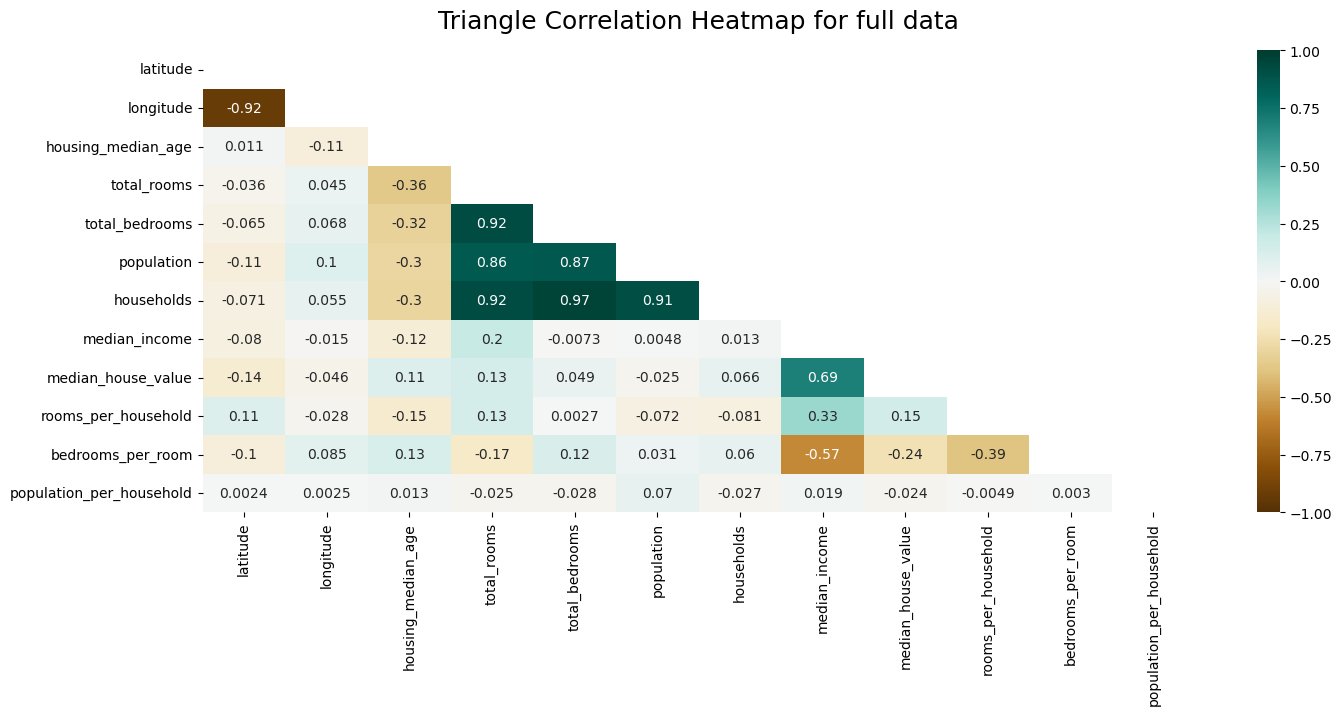

In [25]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap for full data', fontdict={'fontsize':18}, pad=16);
plt.show()

## Make median_house_value binary
## We need to turn the median_house_value variable from numeric into binary.
## Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [26]:
df_class = df.copy()
mean = df_class['median_house_value'].mean()
df_class['above_average'] = np.where(df_class['median_house_value']>=mean,1,0)
#df_class

# Split and train

## Split your data in train/val/test sets, with 60%/20%/20% distribution.

## Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
## Make sure that the target value (median_house_value) is not in your dataframe.

In [27]:
df_class = df_class.drop('median_house_value', axis=1)

In [28]:
df_train_full, df_test = train_test_split(df_class, test_size=0.2, random_state=SEED)
#print(df_train_full)

In [29]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=SEED)
#print(df_train)

In [30]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [31]:
y_train = df_train.above_average.values
#print(y_train)
y_val = df_val.above_average.values
y_test = df_test.above_average.values

# Mutual information

## Question 3

### Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.

### What is the value of mutual information?

### Round it to 2 decimal digits using round(score, 2)

In [32]:
mutual_info_score(df_train['ocean_proximity'], df_train.above_average).round(2)

0.1

In [33]:
#cat = ['ocean_proximity']

In [34]:
#def calculate_mi(series):
    #return round(mutual_info_score(series, df_train.above_average),2)

#df_mi = df_train[cat].apply(calculate_mi)
#df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

In [35]:
#df_mi

# Classification and accuracy

## Question 4

### Now let's train a logistic regression

### Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.

### Fit the model on the training dataset.

### To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

### Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [36]:
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

In [37]:
numerical = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

In [38]:
categorical = ['ocean_proximity']

In [39]:
# Create dictionaries of the training data to apply one-hot enconding on categorical fatures 
train_dict = df_train[categorical + numerical].to_dict(orient='records')
#train_dict[0]

In [40]:
# Create feature matrix with numerical and one-hot encoded categorical variables
#dv = DictVectorizer()
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)
X_train.shape

(12384, 16)

In [41]:
# Fit and train logistic regression model 
lr = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=SEED)
#lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [42]:
# Create feature matrix of validation partition 
val_dict = df_val[categorical + numerical].to_dict(orient='records')
#X_val = dv.fit_transform(val_dict)
X_val = dv.transform(val_dict)

In [43]:
# Make predictions on the validation dataset 
#y_pred2 = lr.predict(X_val)
y_pred = lr.predict_proba(X_val)[:, 1]

In [44]:
# Define a threshold to calculate the accuracy 
churn_decision = (y_pred >= 0.5)

In [45]:
# Obtain accuracy 
accu = round((y_val == churn_decision).mean(),2)
print(f'Accuracy on validation set : {accu}')

#accu = accuracy_score(y_val, y_pred2)
#print(np.round(accu,2))

#accu = np.round(accuracy_score(y_val, y_pred2),2)
#print(accu)

Accuracy on validation set : 0.84


# Feature elimination 

## Question 5

### Let's find the least useful feature using the feature elimination technique.

### Train a model with all these features (using the same parameters as in Q4).

### Now exclude each feature from this set and train a model without it. Record the accuracy for each model.

### For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

### Which of following feature has the smallest difference?
* `'total_rooms'`
* `'total_bedrooms'`
* `'population'`
* `'households'`

note: the difference doesn't have to be positive

In [46]:
features = categorical + numerical
features

['ocean_proximity',
 'latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [47]:
#orig_score = accuracy
orig_score = accu

for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    lr = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=SEED)
    lr.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = lr.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, (orig_score - score), score)

ocean_proximity 0.02023255813953484 0.8197674418604651
latitude 0.007635658914728616 0.8323643410852714
longitude 0.004001937984496107 0.8359980620155039
housing_median_age 0.009331395348837201 0.8306686046511628
total_rooms 0.0027906976744185297 0.8372093023255814
total_bedrooms 0.0015794573643410637 0.8384205426356589
population 0.013691860465116279 0.8263081395348837
households 0.00618217054263559 0.8338178294573644
median_income 0.05511627906976746 0.7848837209302325
rooms_per_household 0.004001937984496107 0.8359980620155039
bedrooms_per_room 0.003759689922480547 0.8362403100775194
population_per_household 0.003759689922480547 0.8362403100775194


In [48]:


differences = {}

for i in features:
    subset = features.copy()
    subset.remove(i)

    #df_train_temp = df_train.drop(i, 1)
    #print(df_train_temp)
    train_dict_temp = df_train[subset].to_dict(orient='records')
    dv_temp = DictVectorizer()
    X_train_temp = dv_temp.fit_transform(train_dict_temp)
 
    lr = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=SEED)
    lr.fit(X_train_temp, y_train)
    
    df_val_temp = df_val.drop(i, 1)
    val_dict_temp = df_val_temp.to_dict(orient='records')
    X_val_temp = dv_temp.transform(val_dict_temp)

    y_pred_temp = lr.predict_proba(X_val_temp)[:, 1]

    churn_decision_temp = (y_pred_temp >= 0.5)

    acc_temp = (y_val == churn_decision_temp).mean()
    #print(accu)
    #print(acc_temp)
    #diff_acc = abs(accuracy - acc_temp)
    

    #print(f'Accuracy difference between LR model with all features and without {i} feature: {diff_acc}')
    
    differences[i] =  abs(accu - acc_temp)
print(differences)

{'ocean_proximity': 0.02023255813953484, 'latitude': 0.007635658914728616, 'longitude': 0.004001937984496107, 'housing_median_age': 0.009331395348837201, 'total_rooms': 0.0027906976744185297, 'total_bedrooms': 0.0015794573643410637, 'population': 0.013691860465116279, 'households': 0.00618217054263559, 'median_income': 0.05511627906976746, 'rooms_per_household': 0.004001937984496107, 'bedrooms_per_room': 0.003759689922480547, 'population_per_household': 0.003759689922480547}


In [49]:
{key: value for key, value in differences.items() if key in ['total_rooms', 'total_bedrooms', 'population', 'households' ] }

{'total_rooms': 0.0027906976744185297,
 'total_bedrooms': 0.0015794573643410637,
 'population': 0.013691860465116279,
 'households': 0.00618217054263559}

# Question 6

For this question, we'll see how to use a linear regression model from Scikit-Learn

We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.

Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.

This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]

Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest alpha.

In [50]:
df['median_house_value']=np.log1p(df['median_house_value'])
#df

In [51]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=SEED)

In [52]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=SEED)

In [53]:
df_train = df_train.reset_index(drop=True)
#print(df_train)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [54]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [55]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [56]:
train_dict = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

x_train = dv.transform(train_dict)

val_dict = df_val.to_dict(orient='records')
x_val = dv.transform(val_dict)

In [57]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [58]:
for a in [0, 0.01, 0.1, 1, 10]:
    RG = Ridge(alpha=a, solver="sag", random_state=SEED)
    RG.fit(x_train, y_train)
    
    y_pred = RG.predict(x_val)
    
    #round(rmse(y_test, y_null_pred_test), 2)
    
    rmse_val = rmse(y_val, y_pred)

    print(f'RMSE of Ridge regression with alpha {a}: { rmse_val:.3f}')
    #rmse_val = np.sqrt(mean_squared_error(y_val, y_pred))

RMSE of Ridge regression with alpha 0: 0.524
RMSE of Ridge regression with alpha 0.01: 0.524
RMSE of Ridge regression with alpha 0.1: 0.524
RMSE of Ridge regression with alpha 1: 0.524
RMSE of Ridge regression with alpha 10: 0.524


# Metrics